In [2]:
import pulp 
import numpy as np
import networkx as nx
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from numpy import genfromtxt
from numpy import linalg as LA
import scipy as sp
import sympy
import sys
import networkx.algorithms.approximation as nxaa

In [33]:
mydata = genfromtxt('1hmk.csv', delimiter=',')
mydata = mydata[1:,1:]
m = len(mydata)
print(m)

121


In [34]:
for i in range(0,m):
    for j in range(0,m):
        if i ==j:
            mydata[i][j] = 1
        
print(mydata)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


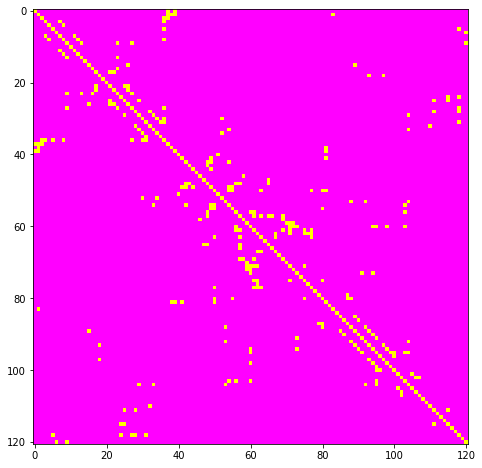

In [35]:
plt.figure(figsize=(12,8))
plt.imshow(mydata, cmap='spring', interpolation='nearest')
plt.show()

### creat the graph using networkX

In [37]:
G = nx.Graph(mydata)

## removing isolated nodes

In [42]:
"""
for component in list(nx.connected_components(G)):
    if len(component)<= 3:
        for node in component:
            G.remove_node(node)
m = len(G.nodes)
print(m)            
"""

96


# MIP package

In [5]:
from mip import Model, xsum, maximize, BINARY
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY

In [38]:
m = Model("minimum_dominating_set")

I = range(len(G.nodes()))

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = minimize(xsum(x[i] for i in I))

for j in G.nodes():
    
    m += x[j]+ xsum(x[u] for u in G.neighbors(j)) >= 1

m.optimize()
selected=[]
number_of_mds=0
for i in I:
    if x[i].x >= 0.99:
        selected = np.append(selected,i)
        number_of_mds += 1

print("selected items: {}".format(selected))
print(number_of_mds)

selected items: [  1.   7.   8.  10.  14.  19.  20.  22.  23.  26.  31.  32.  34.  36.
  39.  45.  47.  48.  49.  51.  57.  58.  60.  62.  64.  68.  70.  74.
  78.  80.  82.  84.  87.  89.  90.  95.  96.  97. 101. 102. 104. 108.
 109. 112. 113. 114. 115. 116. 117. 119. 120.]
51


# PuLp package

/opt/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1530: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


time = 0.1018068790435791 seconds
1,6,7,8,10,14,18,19,20,22,23,26,31,32,36,39,43,45,47,49,51,52,57,58,60,62,64,68,70,74,78,80,82,84,87,89,90,95,96,102,104,105,108,109,112,113,114,115,116,117,119,

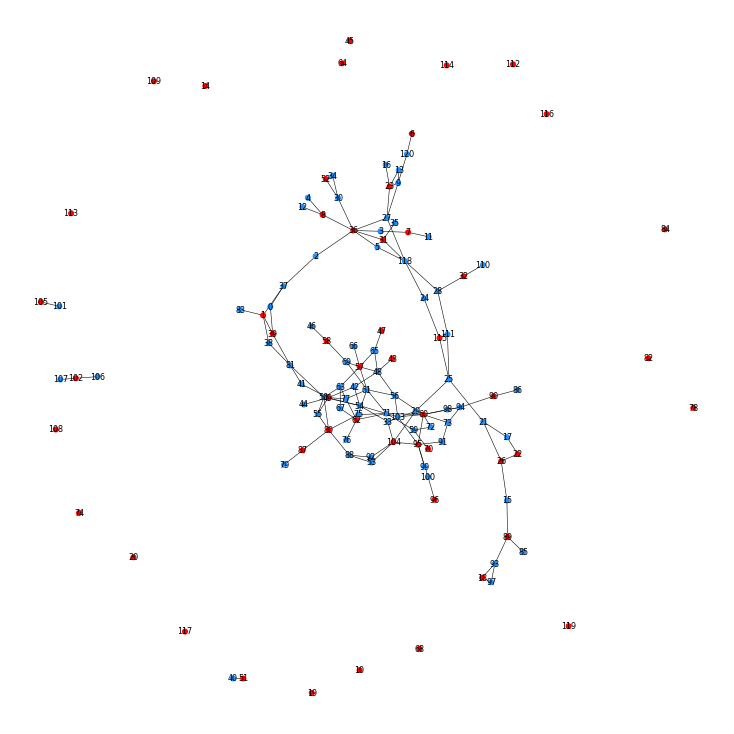

In [39]:
# define the problem
prob = pulp.LpProblem("minimum_dominating_set", pulp.LpMinimize)

# define the variables
x = pulp.LpVariable.dicts("x", G.nodes(), cat=pulp.LpBinary)

# define the objective function
start_time = time.time()

for (v,u) in G.edges():
    
    prob += pulp.lpSum(x)
    
# define the constraints
for v in G.nodes():
       prob += x[v] + pulp.lpSum([x[u] for u in G.neighbors(v)]) >= 1
        
color_map = [] 
# solve
prob.solve()
end_time = time.time()
print("time = %s seconds" % (end_time - start_time))

# display solution
for v in G.nodes():
    if pulp.value(x[v]) > 0.99:
        
        color_map.append('red')
            
        print(v,end=',')
        
    else:
        color_map.append('dodgerblue') 
        
plt.figure(3,figsize=(10,10)) 
nx.draw(G, node_color=color_map, node_size=25,width=0.55, with_labels=True,font_size=8)
plt.savefig("1b9c_center.pdf")
plt.show()



In [40]:
i = 0
for v in prob.variables():
    if v.varValue == 1:
        #print(v.name, "=", v.varValue)
        i = i+1
print(i)

51


In [96]:
def nodes_connected(u, v):
    
    return u in G.neighbors(v)

In [97]:
nodes_connected(40,213)

True